In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split


In [3]:
X, y = make_moons(100, noise=0.25, random_state=4)

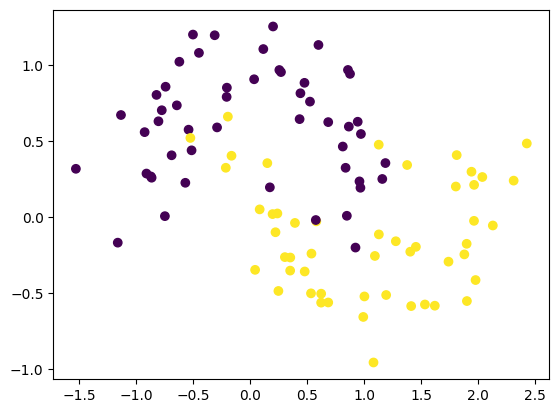

In [4]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()


In [5]:
trainx, testx, trainy, testy = train_test_split(X,y, test_size=0.2, random_state=41)
trainx.shape


(80, 2)

#### Here just train the model without considering the overfitting or underfitting 

In [6]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim = 2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8705 (34.00 KB)
Trainable params: 8705 (34.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy',optimizer='adam', metrics = 'accuracy')

In [8]:
model.fit(trainx,trainy, epochs=1000, validation_data=(trainx, trainy))

Epoch 1/1000
3/3 [==============================] - 1s 100ms/step - loss: 0.6557 - accuracy: 0.8250 - val_loss: 0.6219 - val_accuracy: 0.8375
Epoch 2/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.6125 - accuracy: 0.8375 - val_loss: 0.5841 - val_accuracy: 0.8375
Epoch 3/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.5764 - accuracy: 0.8375 - val_loss: 0.5502 - val_accuracy: 0.8500
Epoch 4/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.5415 - accuracy: 0.8500 - val_loss: 0.5201 - val_accuracy: 0.8625
Epoch 5/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.5111 - accuracy: 0.8625 - val_loss: 0.4920 - val_accuracy: 0.8625
Epoch 6/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.4854 - accuracy: 0.8625 - val_loss: 0.4660 - val_accuracy: 0.8500
Epoch 7/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.4600 - accuracy: 0.8500 - val_loss: 0.4420 - val_accuracy: 0.8500
Epoch 8/1000

#### The curve shows the overfitting of the model

9600/9600 [==============================] - 12s 1ms/step


<Axes: >

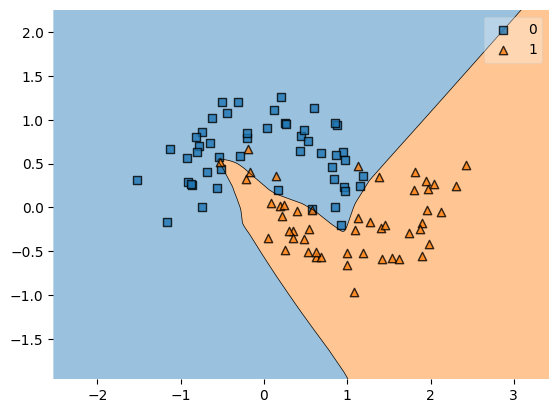

In [9]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model)

In [10]:
model1 = Sequential()
model1.add(Dense(128, activation='relu', input_dim = 2, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dropout(0.5))
model1.add(Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(Dropout(0.5))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8705 (34.00 KB)
Trainable params: 8705 (34.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy',optimizer='adam', metrics = 'accuracy')

In [12]:
history1 = model1.fit(trainx,trainy, epochs=1000, validation_data=(trainx, trainy))

Epoch 1/1000
3/3 [==============================] - 1s 115ms/step - loss: 1.5851 - accuracy: 0.2375 - val_loss: 1.5342 - val_accuracy: 0.6375
Epoch 2/1000
3/3 [==============================] - 0s 25ms/step - loss: 1.5162 - accuracy: 0.8250 - val_loss: 1.4711 - val_accuracy: 0.8875
Epoch 3/1000
3/3 [==============================] - 0s 26ms/step - loss: 1.4547 - accuracy: 0.8875 - val_loss: 1.4126 - val_accuracy: 0.8750
Epoch 4/1000
3/3 [==============================] - 0s 26ms/step - loss: 1.3980 - accuracy: 0.8625 - val_loss: 1.3584 - val_accuracy: 0.8625
Epoch 5/1000
3/3 [==============================] - 0s 27ms/step - loss: 1.3447 - accuracy: 0.8625 - val_loss: 1.3077 - val_accuracy: 0.8625
Epoch 6/1000
3/3 [==============================] - 0s 31ms/step - loss: 1.2947 - accuracy: 0.8625 - val_loss: 1.2598 - val_accuracy: 0.8625
Epoch 7/1000
3/3 [==============================] - 0s 26ms/step - loss: 1.2469 - accuracy: 0.8625 - val_loss: 1.2141 - val_accuracy: 0.8625
Epoch 8/1000

#### The improvement and reducing the overfitting of the model because of the use of the regulization and dropout layers

9600/9600 [==============================] - 13s 1ms/step


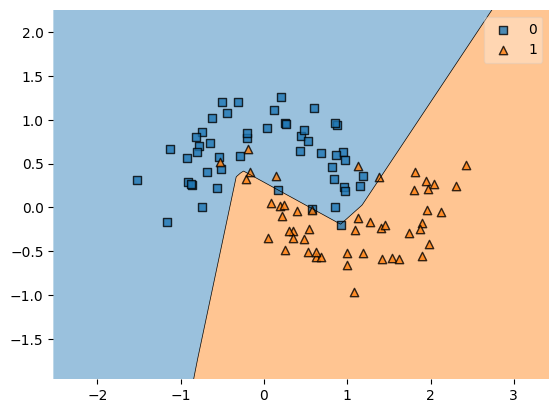

In [13]:
plot_decision_regions(X,y, clf=model1)
plt.show()